## Checkpoint 19.3: Meeting the Assumptions of Linear Regression
Assignments
To close out this checkpoint, you'll do two assignments. Both require you to create Jupyter notebooks. Please submit links to your notebooks below

1. Predicting temperature
In this exercise, you'll work with historical temperature data from the Szeged, Hungary area. The dataset you'll use is a Postgres database version of this dataset from Kaggle. To complete this assignment, submit a Jupyter notebook containing your solutions to the following tasks:


First, load the dataset from the weatherinszeged table from Thinkful's database.
Build a regression model where the target variable is temperature. As explanatory variables, use humidity, windspeed, windbearing, and pressure. Estimate the model using OLS.
Now, check if your model meets the Gauss-Markov Conditions above. If some of the assumptions are not met, discuss the implications of the violations for the correctness of your model.
Here are the credentials you can use to connect to the database:


postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'
As in earlier assignments, be sure to close the database connection after initially pulling in your data.




In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pylab 
import statistics as stats
import scipy.stats as scipy
from pylab import rcParams
import statsmodels.api as sm
from sklearn import linear_model
import os

In [3]:
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))


weather_df = pd.read_sql_query('select * from weatherinszeged',con=engine)

engine.dispose()

In [4]:
weather_df.columns

Index(['date', 'summary', 'preciptype', 'temperature', 'apparenttemperature',
       'humidity', 'windspeed', 'windbearing', 'visibility', 'loudcover',
       'pressure', 'dailysummary'],
      dtype='object')

In [5]:
# let's set up our model
X = weather_df[['humidity', 'windspeed', 'windbearing', 'pressure' ]]
Y= weather_df['temperature']

In [6]:
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            temperature   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                 1.750e+04
Date:                Sat, 06 Jul 2019   Prob (F-statistic):               0.00
Time:                        12:59:38   Log-Likelihood:            -3.2821e+05
No. Observations:               96453   AIC:                         6.564e+05
Df Residuals:                   96448   BIC:                         6.565e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          37.9264      0.233    162.709      0.000      37.470      38.383
humidity      -32.4962      0.123   -264.288      0.000     -32.737     -32.255
windspeed      -0.2014      0.003    -57.557      0.000      -0.208      -0.195
windbearing     0.0040      0.000     18.463      0.000       0.004       0.004
pressure       -0.0007      0.000     -3.452      0.001      -0.001      -0.000
==============================================================================
Omnibus:                     3375.432   Durbin-Watson:                   0.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3793.297
Skew:                          -0.455   Prob(JB):                         0.00
Kurtosis:                       3.339   Cond. No.                     1.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
# Let's run the same info in scikit learn to double check
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

print('\nCoefficents: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficents: 
 [ 0.00000000e+00 -3.24962454e+01 -2.01413742e-01  4.04836936e-03
 -6.91759209e-04]

Intercept: 
 37.92643818528566


Awesome! The coefficents and intercept are the same using both libraries!

### Assumption 1: Linearity of Models in their coefficents
Since we have the very lovely summary above, we can use the information provided to see if there is linearity of the estimated coefficents in our model using the method below.

Our formula for our model is (please ignore the B for betas): 

y= B_0 + B_1X_1 + B_2X_2 + B_3X_3 + B_4X_4 + Error

* Our constant (intercept) is 37.9264
* Our X_1 is humidity with a coefficent of -32.4962
* Our X_2 is windspeed with a coefficent of -0.2014
* Our X_3 is windbearing with a coefficent of 0.0040
* Our X_4 is pressure with a coefficent of -0.0007

I am not totally sure how to check this visually, but, according to the curriculum, since I set a constant for my model it should have linearity of its coefficients!

### Assumption 2: The Error Term Should be Zero on Average

I included a constant in my model (through sklearn by automatically and statsmodel by hand) my error term should be, according to the curriculum, effectively zero.

### Assumption 3: Homoscedasticity
We need to check and see if the distribution of errors is normal or not!

In [8]:
predictions = lrm.predict(X)
errors = Y- predictions

print("Mean of the errors in our model is : {}".format(np.mean(errors)))

Mean of the errors in our model is : -2.682703444870319e-15


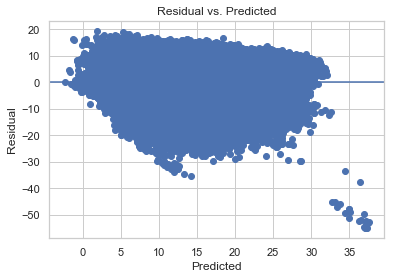

In [9]:
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted');


In [10]:
# Since this looks super weird let's fix our features on X
X = weather_df[['windspeed', 'windbearing', 'pressure' ]]
lrm = linear_model.LinearRegression()
lrm.fit(X,Y)

print('\nCoefficents: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficents: 
 [ 0.00783734  0.00261    -0.00039406]

Intercept: 
 11.753890946359823


In [11]:
predictions = lrm.predict(X)
errors= Y - predictions

print("Mean of the errors in our model is: {}".format(np.mean(errors)))

Mean of the errors in our model is: -1.5205841440399125e-15


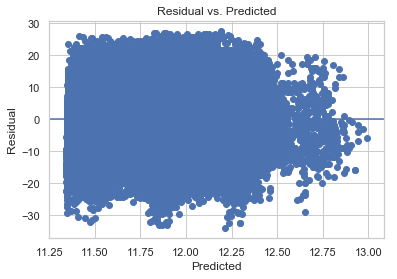

In [12]:
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted');

### Assumption 4: Low Multicollinearity

In [13]:
weather_df.corr()

,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure
temperature,1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,NaN,-0.005447
apparenttemperature,0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,NaN,-0.000219
humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,NaN,0.005454
windspeed,0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,NaN,-0.049263
windbearing,0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,NaN,-0.011651
visibility,0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,NaN,0.059818
loudcover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pressure,-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,NaN,1.000000


This is interesting. It looks like of our 4 features we are using to explain our target (humidity, windspeed, windbearing, and pressure) humidity, though negatively correlated, has a larger correlation to temperature than the others. Besides this it seems that all features are free from multicollinearity.

### Assumption 5: Error Terms Should be Uncorrelated with Each Other

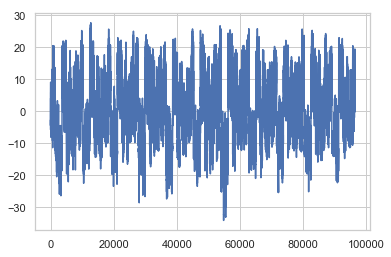

In [14]:
plt.plot(errors);

In [15]:
type(errors)

pandas.core.series.Series

In [16]:
len(errors)

96453

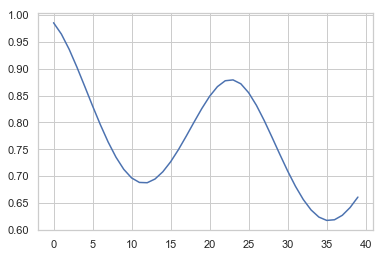

In [17]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)
plt.plot(acf_data[1:]);

Since the first plot is jagged and doesn't really have any rhyme or reason to it we can say that at that point there is no correlation between our errors. But.... after running the autocorrelation function (acf) we actually see some sort of pattern emerge. One important part of the chart to pay attention to is the top left where we see some errors having almost a 1 to 1 correlation. Additionally, the point on the X-axis around 23 shows a pretty high correlation (around 0.87) demonstrating that unfortunately some of our errors have a pretty strong correlation.

### Assumption 6: Features Shouldn't be Correlated with the Errors

I'm not exactly sure how to test this, but my first though is to try graphing the X-features vs. the errors. Unfortunately, everytime I attempt to run a histogram below of features vs. errors it crashes. May have to do feature by feature.

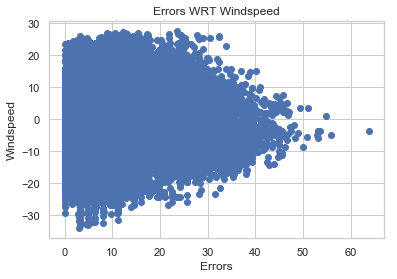

In [26]:
plt.scatter(x= weather_df['windspeed'], y= errors)
plt.title('Errors WRT Windspeed')
plt.xlabel('Errors')
plt.ylabel('Windspeed');

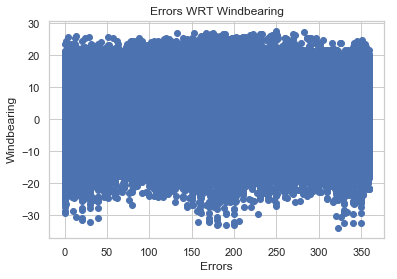

In [27]:
plt.scatter(x= weather_df['windbearing'], y= errors)
plt.title('Errors WRT Windbearing')
plt.xlabel('Errors')
plt.ylabel('Windbearing');

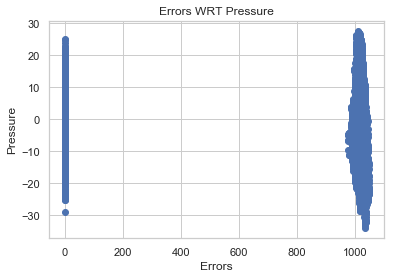

In [28]:
plt.scatter(x= weather_df['pressure'], y= errors)
plt.title('Errors WRT Pressure')
plt.xlabel('Errors')
plt.ylabel('Pressure');

Ick- the graph above is an exact example of homoscedasticity (a.k.a. the errors and the feature values are correlated in a straight line). This is fishy, and if this was a real model I was using I would most likely exclude pressure as a feature in my model.